In [1]:
# required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv(r'C:\Users\Rutuja Vartak\Downloads\Train Set.csv')
print(data.head())

print('\n\nColumn Names\n\n')
print(data.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
#label encode the target variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [4]:
# drop the null values
data.dropna(how='any',inplace=True)

In [5]:
# train-test-split   
train , test = train_test_split(data,test_size=0.2,random_state=0)

In [6]:
# seperate the target and independent variable
train_x = train.drop(columns=['Loan_ID','Loan_Status'],axis=1)
train_y = train['Loan_Status']

In [7]:
test_x = test.drop(columns=['Loan_ID','Loan_Status'],axis=1)
test_y = test['Loan_Status']

In [8]:
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

In [9]:
print('shape of training data : ',train_x.shape)
print('shape of testing data : ',test_x.shape)

shape of training data :  (384, 20)
shape of testing data :  (96, 20)


In [10]:
# create the object of the model
import matplotlib.pyplot as plt
model = LogisticRegression(max_iter = 100000)

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',predict)

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))



Predicted Values on Test Data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1]


Accuracy Score on test data : 


0.7604166666666666


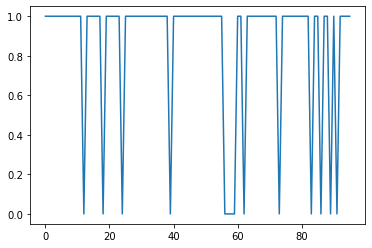

In [15]:
plt.plot(predict)